<a href="https://colab.research.google.com/github/beamconan/ML/blob/master/LAB_3_To.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

LAB_3

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [2]:
data_bj  = pd.read_csv('/content/BeijingPM20100101_20151231.csv')
data_cd = pd.read_csv('/content/ChengduPM20100101_20151231.csv')
data_bj
data_cd

,No,year,month,day,hour,season,PM_Caotangsi,PM_Shahepu,PM_US Post,DEWP,HUMI,PRES,TEMP,cbwd,Iws,precipitation,Iprec
0,1,2010,1,1,0,4,NaN,NaN,NaN,4.0,81.20,1022.0,7.0,cv,1.0,0.0,0.0
1,2,2010,1,1,1,4,NaN,NaN,NaN,4.0,86.99,1022.0,6.0,cv,1.0,0.0,0.0
2,3,2010,1,1,2,4,NaN,NaN,NaN,4.0,86.99,1021.0,6.0,cv,1.0,0.0,0.0
3,4,2010,1,1,3,4,NaN,NaN,NaN,3.0,86.89,1021.0,5.0,cv,1.0,0.0,0.0
4,5,2010,1,1,4,4,NaN,NaN,NaN,2.0,86.79,1021.0,4.0,cv,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52579,52580,2015,12,31,19,4,176.0,225.0,262.0,7.0,87.28,1027.0,9.0,NW,2.0,0.0,0.0
52580,52581,2015,12,31,20,4,146.0,181.0,218.0,7.0,87.28,1028.0,9.0,NW,4.0,0.0,0.0
52581,52582,2015,12,31,21,4,162.0,175.0,213.0,7.0,87.28,1028.0,9.0,cv,1.0,0.0,0.0
52582,52583,2015,12,31,22,4,169.0,192.0,236.0,7.0,93.40,1028.0,8.0,NW,2.0,0.0,0.0


In [3]:
df_bj= pd.DataFrame(data_bj,columns=['HUMI','PRES','Iws','Iprec'])
df_cd= pd.DataFrame(data_cd,columns=['HUMI','PRES','Iws','Iprec'])
df_bj

,HUMI,PRES,Iws,Iprec
0,43.0,1021.0,1.79,0.0
1,47.0,1020.0,4.92,0.0
2,43.0,1019.0,6.71,0.0
3,55.0,1019.0,9.84,0.0
4,51.0,1018.0,12.97,0.0
...,...,...,...,...
52579,68.0,1031.0,7.14,0.0
52580,63.0,1030.0,8.03,0.0
52581,73.0,1030.0,0.89,0.0
52582,73.0,1030.0,1.78,0.0


In [4]:
date_bj = pd.to_datetime(pd.DataFrame(data_bj,columns=['year','month','day','hour']))
date_bj

0       2010-01-01 00:00:00
1       2010-01-01 01:00:00
2       2010-01-01 02:00:00
3       2010-01-01 03:00:00
4       2010-01-01 04:00:00
                ...        
52579   2015-12-31 19:00:00
52580   2015-12-31 20:00:00
52581   2015-12-31 21:00:00
52582   2015-12-31 22:00:00
52583   2015-12-31 23:00:00
Length: 52584, dtype: datetime64[ns]

In [5]:
date_cd = pd.to_datetime(pd.DataFrame(data_cd,columns=['year','month','day','hour']))
date_cd

0       2010-01-01 00:00:00
1       2010-01-01 01:00:00
2       2010-01-01 02:00:00
3       2010-01-01 03:00:00
4       2010-01-01 04:00:00
                ...        
52579   2015-12-31 19:00:00
52580   2015-12-31 20:00:00
52581   2015-12-31 21:00:00
52582   2015-12-31 22:00:00
52583   2015-12-31 23:00:00
Length: 52584, dtype: datetime64[ns]

In [6]:
df_bj['Time'] = date_cd
df_bj['city'] = 'Beijing'
df_bj = df_bj[['Time', 'HUMI','PRES','Iws','Iprec','city']]
df_bj

,Time,HUMI,PRES,Iws,Iprec,city
0,2010-01-01 00:00:00,43.0,1021.0,1.79,0.0,Beijing
1,2010-01-01 01:00:00,47.0,1020.0,4.92,0.0,Beijing
2,2010-01-01 02:00:00,43.0,1019.0,6.71,0.0,Beijing
3,2010-01-01 03:00:00,55.0,1019.0,9.84,0.0,Beijing
4,2010-01-01 04:00:00,51.0,1018.0,12.97,0.0,Beijing
...,...,...,...,...,...,...
52579,2015-12-31 19:00:00,68.0,1031.0,7.14,0.0,Beijing
52580,2015-12-31 20:00:00,63.0,1030.0,8.03,0.0,Beijing
52581,2015-12-31 21:00:00,73.0,1030.0,0.89,0.0,Beijing
52582,2015-12-31 22:00:00,73.0,1030.0,1.78,0.0,Beijing


In [7]:
df_cd['Time'] = date_cd
df_cd['city'] = 'Chengdu'
df_cd = df_cd[['Time', 'HUMI','PRES','Iws','Iprec','city']]
df_cd

,Time,HUMI,PRES,Iws,Iprec,city
0,2010-01-01 00:00:00,81.20,1022.0,1.0,0.0,Chengdu
1,2010-01-01 01:00:00,86.99,1022.0,1.0,0.0,Chengdu
2,2010-01-01 02:00:00,86.99,1021.0,1.0,0.0,Chengdu
3,2010-01-01 03:00:00,86.89,1021.0,1.0,0.0,Chengdu
4,2010-01-01 04:00:00,86.79,1021.0,1.0,0.0,Chengdu
...,...,...,...,...,...,...
52579,2015-12-31 19:00:00,87.28,1027.0,2.0,0.0,Chengdu
52580,2015-12-31 20:00:00,87.28,1028.0,4.0,0.0,Chengdu
52581,2015-12-31 21:00:00,87.28,1028.0,1.0,0.0,Chengdu
52582,2015-12-31 22:00:00,93.40,1028.0,2.0,0.0,Chengdu


In [8]:
import seaborn as sns
g = sns.PairGrid(result,hue='city',hue_kws={"cmap":["Blues","Purples"]},dropna=True)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)
g.map_diag(sns.distplot)

NameError: ignored

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:3

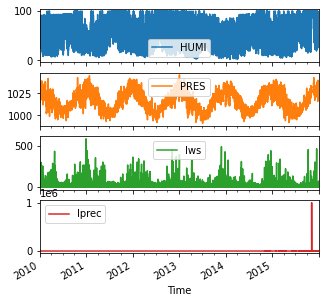

In [9]:
axes = df_bj.plot.line(x='Time', subplots=True, figsize=(5, 5))

In [10]:
df_bj[df_bj.columns[1:5]] = df_bj[df_bj.columns[1:5]].apply(pd.to_numeric, errors='coerce')
# df_bj = df_bj.fillna(df_bj.median()) # จัดการข้อมูลหาย แทนที่ด้วย median
df_bj = df_bj.dropna()
df_bj = df_bj.drop_duplicates()
df_bj

,Time,HUMI,PRES,Iws,Iprec,city
0,2010-01-01 00:00:00,43.0,1021.0,1.79,0.0,Beijing
1,2010-01-01 01:00:00,47.0,1020.0,4.92,0.0,Beijing
2,2010-01-01 02:00:00,43.0,1019.0,6.71,0.0,Beijing
3,2010-01-01 03:00:00,55.0,1019.0,9.84,0.0,Beijing
4,2010-01-01 04:00:00,51.0,1018.0,12.97,0.0,Beijing
...,...,...,...,...,...,...
52579,2015-12-31 19:00:00,68.0,1031.0,7.14,0.0,Beijing
52580,2015-12-31 20:00:00,63.0,1030.0,8.03,0.0,Beijing
52581,2015-12-31 21:00:00,73.0,1030.0,0.89,0.0,Beijing
52582,2015-12-31 22:00:00,73.0,1030.0,1.78,0.0,Beijing


In [11]:
df_cd[df_cd.columns[1:5]] = df_cd[df_cd.columns[1:5]].apply(pd.to_numeric, errors='coerce')
df_cd.dropna()
df_cd = df_cd.drop_duplicates()
df_cd

,Time,HUMI,PRES,Iws,Iprec,city
0,2010-01-01 00:00:00,81.20,1022.0,1.0,0.0,Chengdu
1,2010-01-01 01:00:00,86.99,1022.0,1.0,0.0,Chengdu
2,2010-01-01 02:00:00,86.99,1021.0,1.0,0.0,Chengdu
3,2010-01-01 03:00:00,86.89,1021.0,1.0,0.0,Chengdu
4,2010-01-01 04:00:00,86.79,1021.0,1.0,0.0,Chengdu
...,...,...,...,...,...,...
52579,2015-12-31 19:00:00,87.28,1027.0,2.0,0.0,Chengdu
52580,2015-12-31 20:00:00,87.28,1028.0,4.0,0.0,Chengdu
52581,2015-12-31 21:00:00,87.28,1028.0,1.0,0.0,Chengdu
52582,2015-12-31 22:00:00,93.40,1028.0,2.0,0.0,Chengdu


In [12]:
result = df_bj.append(df_cd, ignore_index=False, sort=True)
result.dropna()

,HUMI,Iprec,Iws,PRES,Time,city
0,43.00,0.0,1.79,1021.0,2010-01-01 00:00:00,Beijing
1,47.00,0.0,4.92,1020.0,2010-01-01 01:00:00,Beijing
2,43.00,0.0,6.71,1019.0,2010-01-01 02:00:00,Beijing
3,55.00,0.0,9.84,1019.0,2010-01-01 03:00:00,Beijing
4,51.00,0.0,12.97,1018.0,2010-01-01 04:00:00,Beijing
...,...,...,...,...,...,...
52579,87.28,0.0,2.00,1027.0,2015-12-31 19:00:00,Chengdu
52580,87.28,0.0,4.00,1028.0,2015-12-31 20:00:00,Chengdu
52581,87.28,0.0,1.00,1028.0,2015-12-31 21:00:00,Chengdu
52582,93.40,0.0,2.00,1028.0,2015-12-31 22:00:00,Chengdu


In [13]:
result.sort_values(by=['Time'])


,HUMI,Iprec,Iws,PRES,Time,city
0,43.00,0.0,1.79,1021.0,2010-01-01 00:00:00,Beijing
0,81.20,0.0,1.00,1022.0,2010-01-01 00:00:00,Chengdu
1,86.99,0.0,1.00,1022.0,2010-01-01 01:00:00,Chengdu
1,47.00,0.0,4.92,1020.0,2010-01-01 01:00:00,Beijing
2,43.00,0.0,6.71,1019.0,2010-01-01 02:00:00,Beijing
...,...,...,...,...,...,...
52581,73.00,0.0,0.89,1030.0,2015-12-31 21:00:00,Beijing
52582,73.00,0.0,1.78,1030.0,2015-12-31 22:00:00,Beijing
52582,93.40,0.0,2.00,1028.0,2015-12-31 22:00:00,Chengdu
52583,79.00,0.0,2.67,1029.0,2015-12-31 23:00:00,Beijing


In [0]:
import seaborn as sns
g = sns.PairGrid(result,hue='city',hue_kws={"cmap":["Blues","Purples"]},)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)
g.map_diag(sns.distplot)

/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kernels.py:128: RuntimeWarning: divide by zero encountered in true_divide
  return (1. / np.sqrt(2 * np.pi)) * np.exp(-(Xi - x)**2 / (h**2 * 2.))
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kernels.py:128: RuntimeWarning: invalid value encountered in true_divide
  return (1. / np.sqrt(2 * np.pi)) * np.exp(-(Xi - x)**2 / (h**2 * 2.))
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/_kernel_base.py:516: RuntimeWarning: invalid value encountered in true_divide
  dens = Kval.prod(axis=1) / np.prod(bw[iscontinuous])
/usr/local/lib/python3.6/dist-packages/matplotlib/contour.py:1483: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
/usr/local/lib/python3.6/dist-packages/matplotlib/contour.py:1484: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())
/usr/local/lib/python3.6/dist-packages/matplotlib/contour.py:1132: Runtim

In [0]:
x = result.values #returns a numpy array

In [0]:
min_max_scaler = preprocessing.MinMaxScaler() # Max-Min Norm
x_min_max_scaled = min_max_scaler.fit_transform(x)
df_min_max = pd.DataFrame(x_min_max_scaled)
df_min_max.plot()
df = df_standard # เลือกใช้ Standardized Norm
df

In [0]:
timestep = 4
stride = 2
data = []
for i in range(4,len(df)-timestep+1,stride):
    data.append(df[columns].iloc[i:i+timestep].to_numpy())
array_2 = np.array(data)
array_2.shape

In [0]:
hist_bj = df_bj.hist(bins=8,figsize=(3,3))
hist_bj

hist_gz = df_gz.hist(bins=8,figsize=(3,3))
hist_gz

hist_sc = df_sc.hist(bins=8,figsize=(3,3))
hist_sc